<a href="https://colab.research.google.com/github/JONATHAN-ALMEIDA-MESQUITA/TravelTrendAnalysis/blob/main/Analise_de_viagens_e_tendencia_de_viajantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

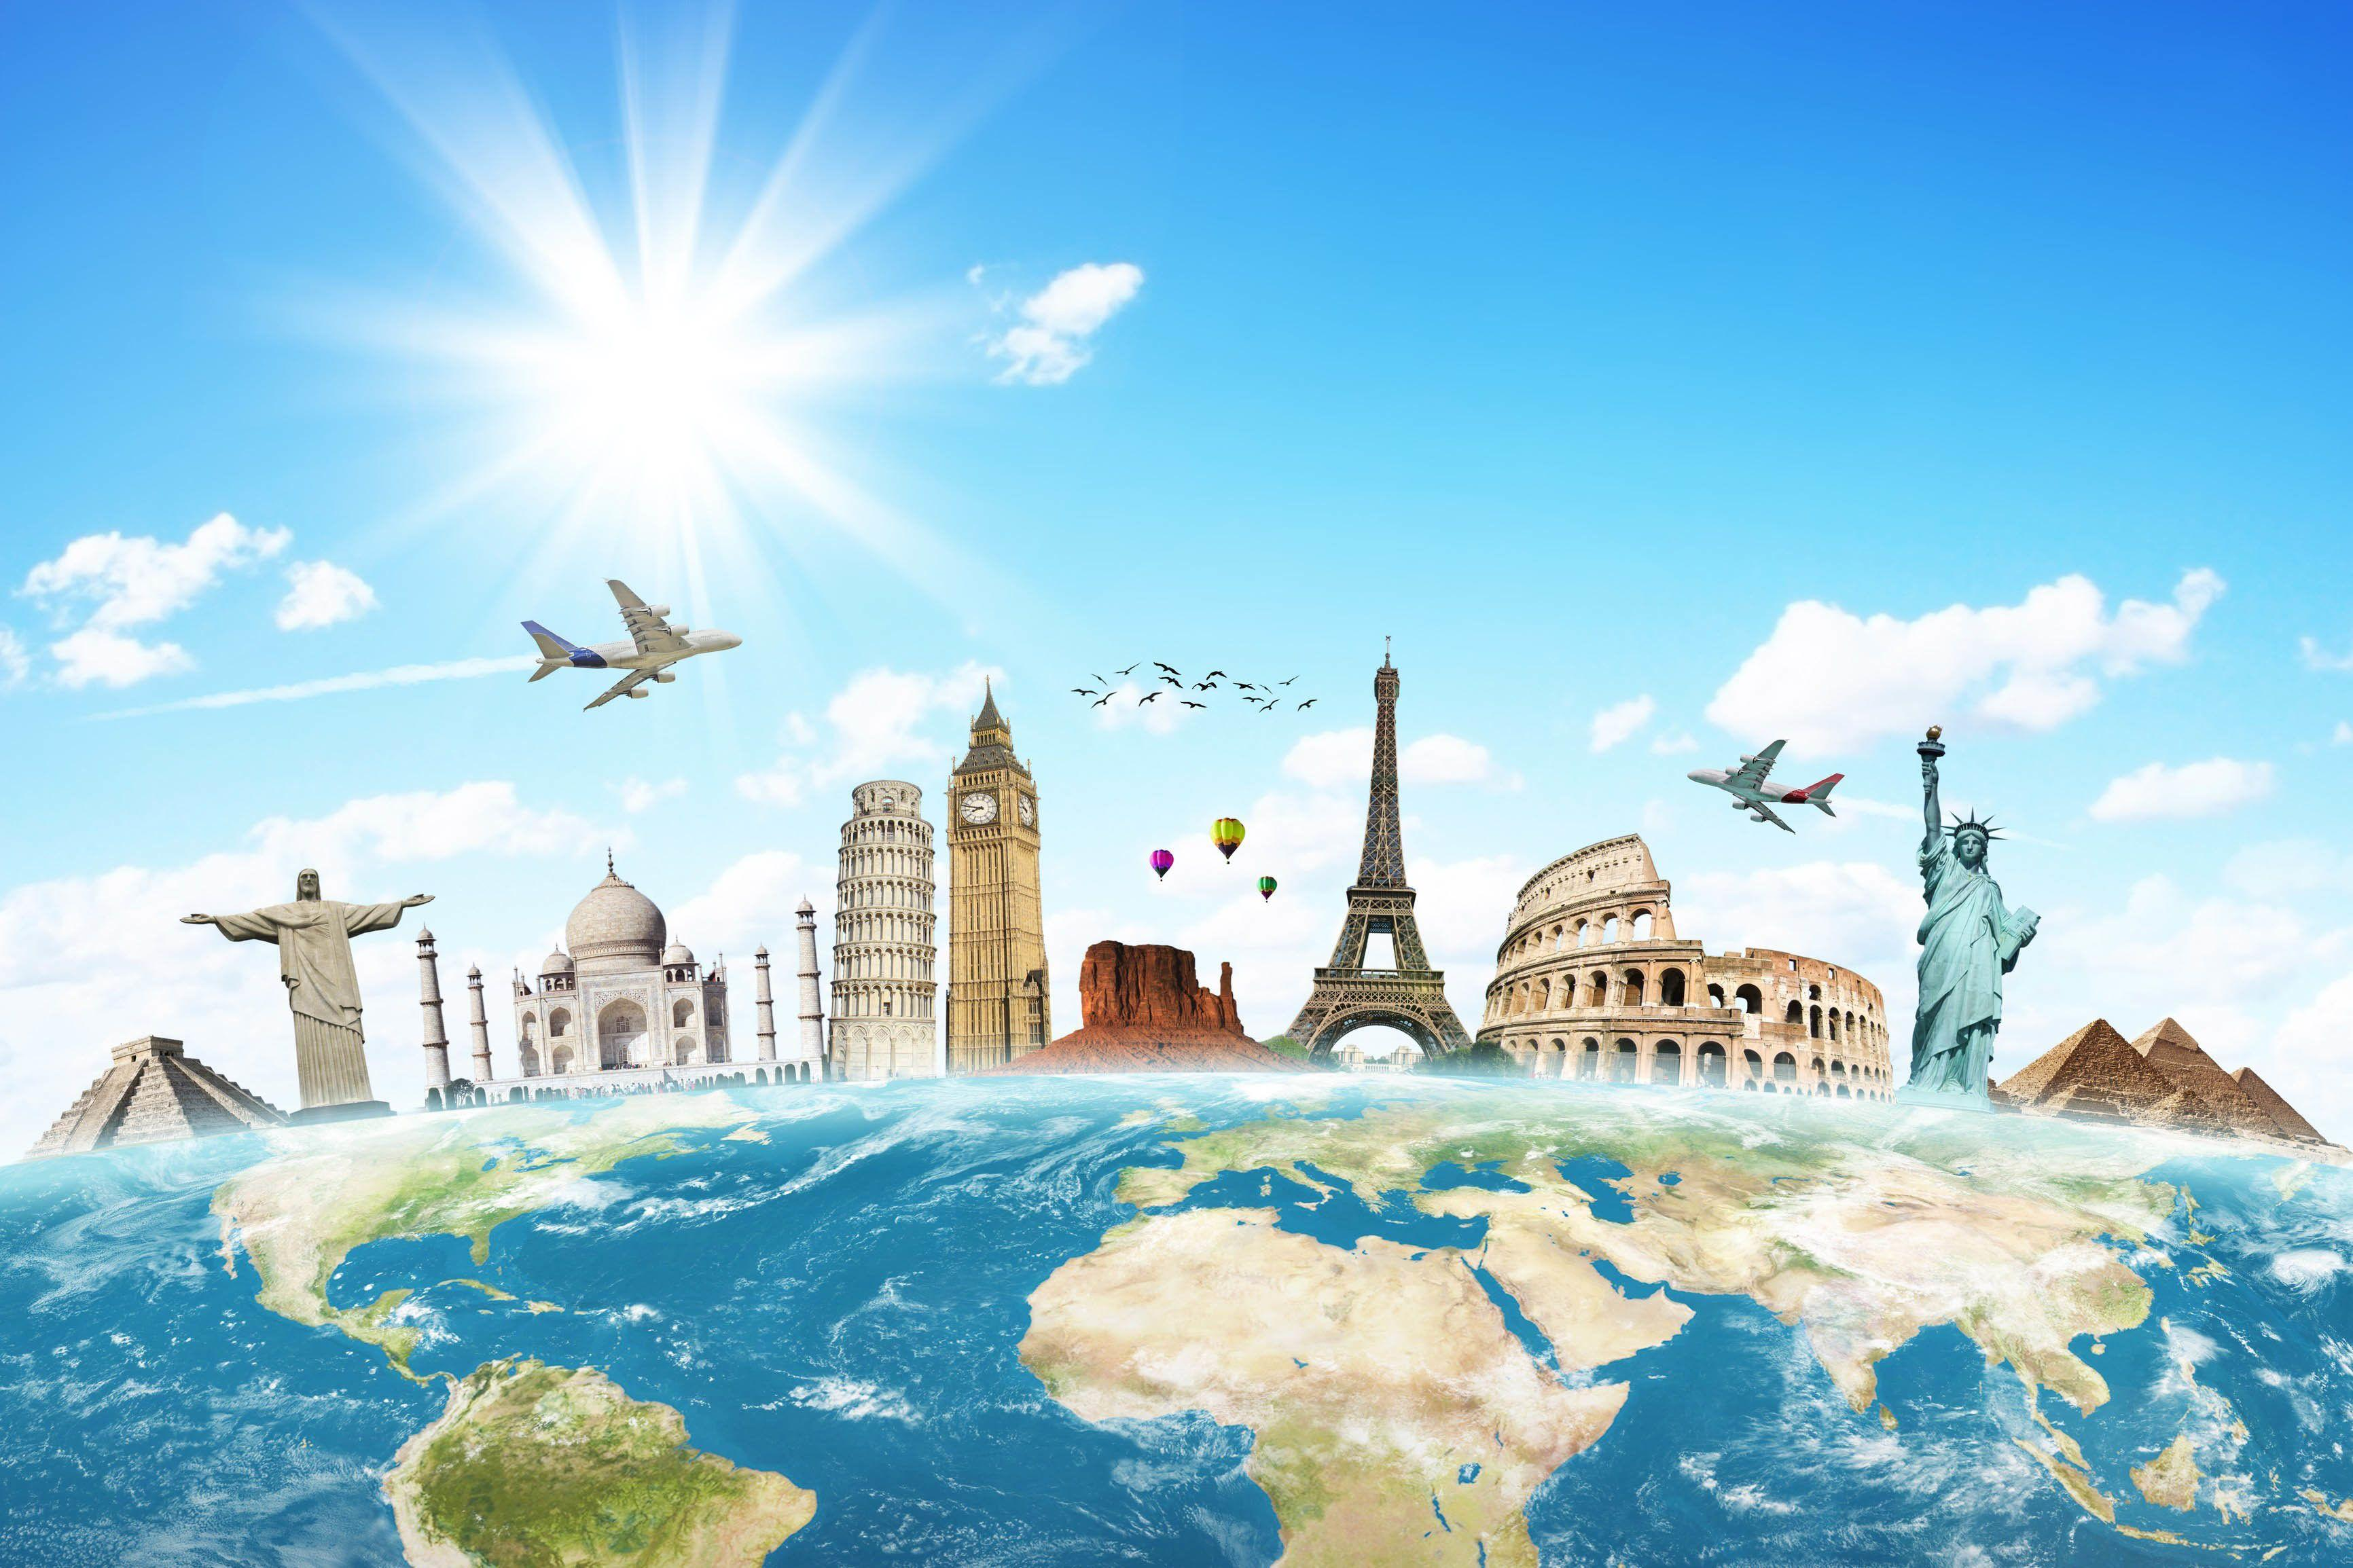

# Sobre o conjunto de dados
O conjunto de dados de viagens fornece informações detalhadas sobre várias viagens realizadas pelos viajantes, incluindo o destino, as datas da viagem, a duração da viagem em dias, a demografia do viajante (nome, idade, sexo e nacionalidade), bem como o tipo e custo do alojamento e transporte. Este conjunto de dados pode ser usado para obter insights sobre padrões de viagem, preferências e comportamentos de diferentes tipos de viajantes. Também pode ser útil para empresas relacionadas a viagens, como agências de viagens, criar estratégias de marketing personalizadas e pacotes de viagens que atendam às necessidades e preferências de diferentes viajantes.

>Trip ID: Um identificador exclusivo para cada viagem realizada por um viajante.

>Destination *(Destino)*: Nome da cidade ou país visitado pelo viajante.

> Start date *(Data de início)*: A data em que o viajante iniciou a viagem.

> End date *(Data final)*: A data em que o viajante encerrou a viagem.

> *Duration *Duração (dias)*: Quantidade de dias que o viajante passou na viagem.

> Traveler name *Nome do viajante*: O nome do viajante.

> Traveler age *Idade do viajante*: A idade do viajante no momento da viagem.

> Traveler gender *Genero do viajante*: O género do viajante.

> Traveler nationality *Nacionalidade do viajante*: A nacionalidade do viajante.

> Accommodation type *Tipo de acomodação*: O tipo de acomodação em que o viajante se hospedou, como hotel, albergue ou Airbnb.

> Accommodation cost *Custo de alojamento*: O custo do alojamento para toda a viagem.

> Transportation type *Tipo de transporte*: O meio de transporte utilizado pelo viajante, como avião, trem ou carro.

> Transportation cost *Custo de transporte*: O custo de transporte para toda a viagem.


#Pipeline



>Exploração e Preparação de Dados:

Carregar o conjunto de dados e fazer uma análise exploratória para entender a distribuição de cada variável.
Lidar com valores ausentes, outliers normalize/transforme as variáveis conforme necessário.
Converta variáveis categóricas em formato adequado para processamento por modelos de aprendizado de máquina.

>Análise de Padrões e Insights:

Utilize visualizações e análises estatísticas para identificar padrões e tendências nos dados.
Explore relações entre diferentes variáveis para extrair insights sobre comportamentos de viagem.

>Modelagem Preditiva:

Divida o conjunto de dados em treino e teste.
Escolha modelos adequados para suas tarefas, como regressão para prever custos de viagem ou classificação para identificar padrões de viagem.
Treine os modelos com o conjunto de treinamento e avalie seu desempenho usando o conjunto de teste.

>Previsão de Gastos Futuros por Nacionalidade:

Agrupe os dados por nacionalidade para analisar o comportamento de gastos ao longo do tempo.
Utilize modelos de previsão de séries temporais ou modelos de regressão para prever os gastos futuros por nacionalidade.

>Otimização de Estratégias de Marketing:

Utilize os insights gerados pelos modelos para otimizar estratégias de marketing, como criar ofertas personalizadas com base nos padrões de viagem identificados.

>Validação e Ajuste:

Avalie o desempenho dos modelos e ajuste-os conforme necessário.
Considere a utilização de técnicas de validação cruzada para avaliar a robustez dos modelos.

>Implementação e Monitoramento:

Implemente os modelos treinados em ambientes de produção.
Estabeleça um sistema de monitoramento para acompanhar o desempenho do modelo ao longo do tempo e realizar atualizações conforme necessário.

## Instalação das bibliotecas

In [ ]:
!pip install pycountry -q
!pip install -q kaggle -q
!pip install ipywidgets -q

#Principais bibliotecas para manipulação de dados
import pandas as pd
import numpy as np
import pycountry
import os as os
from google.colab import userdata
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
from collections import Counter
from pandas_profiling import ProfileReport
import json

#Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas para criação dos algoritimos de machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Apos instalação destas libs é necessarios reiniciar a sessão  e importar a libs novamente.
!pip install pandas-profiling==3.6.6 -q
!pip install pydantic==1.8.2 -q

##Defindo variavel de ambiente e para importação do datase Kaggle e Drive

> ### Aqui estou utilizando uma variavel de ambiente para armazenar minha chave do Kaggle para, pois o dataset esta sendo importado utilizando API do Kaggle

In [ ]:
# Definindo variavel de ambiente do Kaggle
os.environ["KAGGLE_USERNAME"] = userdata.get('kaggle_username')
os.environ["KAGGLE_KEY"] = userdata.get('kaggle_key')

In [ ]:
#Importantdo dataset Kaggle
#Criando uma pasta para armazenar o dataset
%cd /content/

#Carregando dataset do kaggle
!kaggle datasets download -d rkiattisak/traveler-trip-data
#Fazendo unzip do dataset
!unzip traveler-trip-data.zip -d traveler-trip-data

/content
traveler-trip-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traveler-trip-data.zip
replace traveler-trip-data/Travel details dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Importação dataset Kaggle
dados = pd.read_csv('/content/traveler-trip-data.zip', sep=',')

#Iportação base duporte do Drive que irei utilizar para validar as cidades do Dataset Kaggle
cidades = pd.read_csv('/content/drive/MyDrive/Analise de dados_viagens /df_countrys.csv', sep=';')
dados

Trip ID             Destination Start date   End date  Duration (days)  \
0          1              London, UK   5/1/2023   5/8/2023              7.0   
1          2        Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2          3         Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3          4           New York, USA  8/15/2023  8/29/2023             14.0   
4          5            Tokyo, Japan  9/10/2023  9/17/2023              7.0   
..       ...                     ...        ...        ...              ...   
134      135  Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
135      136       Vancouver, Canada  8/15/2023  8/21/2023              6.0   
136      137       Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
137      138        Barcelona, Spain  9/15/2023  9/22/2023              7.0   
138      139   Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

       Traveler name  Traveler age Traveler gender Traveler nationality  \
0         John Smith          35.0            Male             American   
1           Jane Doe          28.0          Female             Canadian   
2          David Lee          45.0            Male               Korean   
3      Sarah Johnson          29.0          Female              British   
4         Kim Nguyen          26.0          Female           Vietnamese   
..               ...           ...             ...                  ...   
134       Jose Perez          37.0            Male            Brazilian   
135      Emma Wilson          29.0          Female             Canadian   
136        Ryan Chen          34.0            Male              Chinese   
137  Sofia Rodriguez          25.0          Female              Spanish   
138    William Brown          39.0            Male        New Zealander   

    Accommodation type Accommodation cost Transportation type  \
0                Hotel               1200              Flight   
1               Resort                800              Flight   
2                Villa               1000              Flight   
3                Hotel               2000              Flight   
4               Airbnb                700               Train   
..                 ...                ...                 ...   
134             Hostel               2500                 Car   
135              Hotel               5000            Airplane   
136             Hostel               2000               Train   
137             Airbnb               6000            Airplane   
138              Hotel               7000               Train   

    Transportation cost  
0                   600  
1                   500  
2                   700  
3                  1000  
4                   200  
..                  ...  
134                2000  
135                3000  
136                1000  
137                2500  
138                2500  

[139 rows x 13 columns]

# Exploração e Preparação de Dados


Após avaliar as 5 primeiras linhas do df, notei que a coluna destination contem a cidade e o pais de destino na mesma coluna, porem para analise que pretendo fazer, preciso da cidade e pais em colunas separadas.

Com isso utilezei o metodo split para separar os dados da coluna Destination com o delimitador ','


In [ ]:
#tratamento da coluna Destination
dados[['City', 'Country']] = dados['Destination'].str.split(', ' , expand=True)
nova_ordem = ['Trip ID','Destination',  'City', 'Country', 'Start date', 'End date', 'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender', 'Traveler nationality', 'Accommodation type', 'Accommodation cost', 'Transportation type', 'Transportation cost']
dados = dados[nova_ordem]
dados.info()
print('-' * 60)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   City                  137 non-null    object 
 3   Country               71 non-null     object 
 4   Start date            137 non-null    object 
 5   End date              137 non-null    object 
 6   Duration (days)       137 non-null    float64
 7   Traveler name         137 non-null    object 
 8   Traveler age          137 non-null    float64
 9   Traveler gender       137 non-null    object 
 10  Traveler nationality  137 non-null    object 
 11  Accommodation type    137 non-null    object 
 12  Accommodation cost    137 non-null    object 
 13  Transportation type   136 non-null    object 
 14  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1)

Notei que apos a separação da coluna *Destination* surgiram alguns campos em branco na coluna Country e como estou considerendo o Country como um campo chave para algumas analises que pretendo fazer, estou fazendo um merge com o df cidades (esse df foi ajustado de acordo com as informações do df dados) a fim de localizar o pais correto das cidades ja obtidas pelo df e os paises que ficaram em branco


In [ ]:
# Realizar um merge com base na coluna 'City' para trazer a coluna 'Country' de 'cidades' para 'dados_invalidos'
dados = dados.merge(cidades[['City', 'Country']], on='City', how='left')

# Atribuir os dados da coluna 'Country_y' para a coluna 'Country_x'
dados['Country_x'] = dados['Country_y']

# Renomear a coluna 'Country_x' para 'Country'
dados = dados.rename(columns={'Country_x': 'Country'})



In [ ]:
#Apagar coluna Country_y
dados = dados.drop(['Country_y'], axis=1)

In [ ]:
dados.isnull().sum()

Trip ID                 0
Destination             2
City                    2
Country                 2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

In [ ]:
#Como temos uma quanditade baixa de linhas em branco, estou excluindo do df
dados = dados.dropna()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               136 non-null    int64  
 1   Destination           136 non-null    object 
 2   City                  136 non-null    object 
 3   Country               136 non-null    object 
 4   Start date            136 non-null    object 
 5   End date              136 non-null    object 
 6   Duration (days)       136 non-null    float64
 7   Traveler name         136 non-null    object 
 8   Traveler age          136 non-null    float64
 9   Traveler gender       136 non-null    object 
 10  Traveler nationality  136 non-null    object 
 11  Accommodation type    136 non-null    object 
 12  Accommodation cost    136 non-null    object 
 13  Transportation type   136 non-null    object 
 14  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1)

In [ ]:
#Ajustando os tipos de dados que estão presentes nas colunas de float para int
dados['Duration (days)'] = dados['Duration (days)'].astype(int)
dados['Traveler age'] = dados['Traveler age'].astype(np.number)

# Converter as colunas 'Start date' e 'End date' para o formato de data
dados['Start date'] = pd.to_datetime(dados['Start date'])
dados['End date'] = pd.to_datetime(dados['End date'])



Agora estou criando uma função para identificar se todos os dados da coluna Country são validos

In [ ]:
# Função para verificar se um valor na coluna 'Country' é um nome de país válido
def is_valid_country(country):
    try:
        pycountry.countries.lookup(country)
        return True
    except LookupError:
        return False

# Criar uma nova coluna 'Is_Valid_Country' que indica se o valor na coluna 'Country' é um nome de país válido
dados['Is_Valid_Country'] = dados['Country'].apply(is_valid_country)


# Contar os valores na coluna 'Is_Valid_Country'
contagem = dados['Is_Valid_Country'].value_counts()

# Imprimir a contagem
print(contagem)


True    136
Name: Is_Valid_Country, dtype: int64


Realizando um check para confirmar se na coluna de custo de acomodação temos apenas numeros, uma vez que a coluna esta como obj


In [ ]:
# Obter a série da coluna de texto
serie_texto = dados['Accommodation cost']

# Concatenar todos os valores da série em uma única string
texto_completo = ' '.join(serie_texto)

# Contar a ocorrência de cada caractere na string
contagem_caracteres = Counter(texto_completo)

# Imprimir os caracteres únicos e sua contagem
for caractere, contagem in contagem_caracteres.items():
    print(f"Caractere: '{caractere}', Contagem: {contagem}")



Caractere: '1', Contagem: 50
Caractere: '2', Contagem: 28
Caractere: '0', Contagem: 294
Caractere: ' ', Contagem: 200
Caractere: '8', Contagem: 17
Caractere: '7', Contagem: 10
Caractere: '5', Contagem: 25
Caractere: '9', Contagem: 13
Caractere: '3', Contagem: 9
Caractere: '4', Contagem: 15
Caractere: '6', Contagem: 9
Caractere: '$', Contagem: 44
Caractere: ',', Contagem: 13
Caractere: 'U', Contagem: 21
Caractere: 'S', Contagem: 21
Caractere: 'D', Contagem: 21


In [ ]:
# Remover os caracteres '$', 'U', 'S' e 'D' da coluna 'texto'
dados['Accommodation cost'] = dados['Accommodation cost'].str.replace('[$USD,]', '', regex=True)

# Convertendo coluna Accommodation cost para float
dados['Accommodation cost'] = dados['Accommodation cost'].astype(float)

Aqui estou aplicando a mesma analise feita na coluna de custo de acomodação

In [ ]:
# Obter a série da coluna de texto
serie_texto = dados['Transportation cost']

# Concatenar todos os valores da série em uma única string
texto_completo = ' '.join(serie_texto)

# Contar a ocorrência de cada caractere na string
contagem_caracteres = Counter(texto_completo)

# Imprimir os caracteres únicos e sua contagem
for caractere, contagem in contagem_caracteres.items():
    print(f"Caractere: '{caractere}', Contagem: {contagem}")

Caractere: '6', Contagem: 9
Caractere: '0', Contagem: 262
Caractere: ' ', Contagem: 200
Caractere: '5', Contagem: 36
Caractere: '7', Contagem: 16
Caractere: '1', Contagem: 38
Caractere: '2', Contagem: 25
Caractere: '8', Contagem: 17
Caractere: '4', Contagem: 7
Caractere: '$', Contagem: 44
Caractere: '3', Contagem: 12
Caractere: '9', Contagem: 4
Caractere: 'U', Contagem: 21
Caractere: 'S', Contagem: 21
Caractere: 'D', Contagem: 21
Caractere: ',', Contagem: 3


In [ ]:
# Remover os caracteres '$', 'U', 'S' e 'D' da coluna 'texto'
dados['Transportation cost'] = dados['Transportation cost'].str.replace('[ $USD,]', '', regex=True)

# Convertendo coluna Transportation cost para float
dados['Transportation cost'] = dados['Transportation cost'].astype(float)

In [ ]:
dados

Trip ID             Destination            City         Country  \
0          1              London, UK          London  United Kingdom   
1          2        Phuket, Thailand          Phuket        Thailand   
2          3         Bali, Indonesia            Bali       Indonesia   
3          4           New York, USA        New York             USA   
4          5            Tokyo, Japan           Tokyo           Japan   
..       ...                     ...             ...             ...   
134      135  Rio de Janeiro, Brazil  Rio de Janeiro          Brazil   
135      136       Vancouver, Canada       Vancouver          Canada   
136      137       Bangkok, Thailand         Bangkok        Thailand   
137      138        Barcelona, Spain       Barcelona           Spain   
138      139   Auckland, New Zealand        Auckland     New Zealand   

    Start date   End date  Duration (days)    Traveler name  Traveler age  \
0   2023-05-01 2023-05-08                7       John Smith          35.0   
1   2023-06-15 2023-06-20                5         Jane Doe          28.0   
2   2023-07-01 2023-07-08                7        David Lee          45.0   
3   2023-08-15 2023-08-29               14    Sarah Johnson          29.0   
4   2023-09-10 2023-09-17                7       Kim Nguyen          26.0   
..         ...        ...              ...              ...           ...   
134 2023-08-01 2023-08-10                9       Jose Perez          37.0   
135 2023-08-15 2023-08-21                6      Emma Wilson          29.0   
136 2023-09-01 2023-09-08                7        Ryan Chen          34.0   
137 2023-09-15 2023-09-22                7  Sofia Rodriguez          25.0   
138 2023-10-01 2023-10-08                7    William Brown          39.0   

    Traveler gender Traveler nationality Accommodation type  \
0              Male             American              Hotel   
1            Female             Canadian             Resort   
2              Male               Korean              Villa   
3            Female              British              Hotel   
4            Female           Vietnamese             Airbnb   
..              ...                  ...                ...   
134            Male            Brazilian             Hostel   
135          Female             Canadian              Hotel   
136            Male              Chinese             Hostel   
137          Female              Spanish             Airbnb   
138            Male        New Zealander              Hotel   

     Accommodation cost Transportation type  Transportation cost  \
0                1200.0              Flight                600.0   
1                 800.0              Flight                500.0   
2                1000.0              Flight                700.0   
3                2000.0              Flight               1000.0   
4                 700.0               Train                200.0   
..                  ...                 ...                  ...   
134              2500.0                 Car               2000.0   
135              5000.0            Airplane               3000.0   
136              2000.0               Train               1000.0   
137              6000.0            Airplane               2500.0   
138              7000.0               Train               2500.0   

     Is_Valid_Country  
0                True  
1                True  
2                True  
3                True  
4                True  
..                ...  
134              True  
135              True  
136              True  
137              True  
138              True  

[136 rows x 16 columns]

Buscando valores unicos da coluna tipo de transporte a fim de padronizar os dados

In [ ]:
dados['Transportation type'].unique()

array(['Flight', 'Train', 'Plane', 'Bus', 'Car rental', 'Subway', 'Car',
       'Ferry', 'Airplane'], dtype=object)

In [ ]:
#Padronizando as informações Flight e Airplane para Plane
dados["Transportation type"].replace({"Flight":"Plane", "Airplane": "Plane"}, inplace=True)

Analise do perido que temos no df

In [ ]:
# Extrair o ano de 'Start date' e 'End date' e combinar as informações em uma única série
anos = pd.concat([dados['Start date'].dt.year, dados['End date'].dt.year])

# Obter uma lista de anos únicos
anos_unicos = anos.unique()

# Classificar a lista de anos únicos (opcional)
anos_unicos.sort()

# Imprimir a lista de anos únicos
print("Anos de dados presentes:", anos_unicos)


Anos de dados presentes: [2021 2022 2023 2024 2025]


## Graficos

Análise de Frequência de Viagem por Viajante:

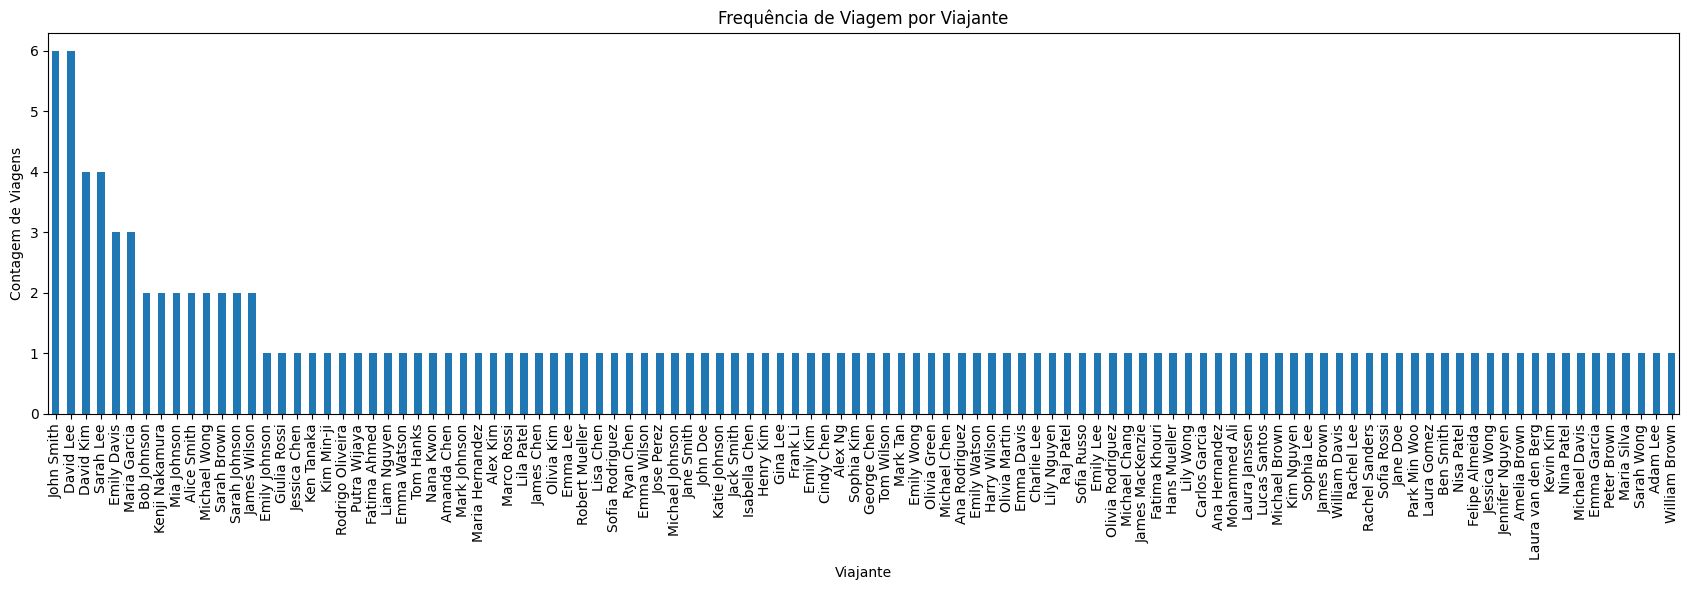

In [ ]:
# Determine com que frequência cada viajante aparece nos dados
traveler_frequency = dados['Traveler name'].value_counts()

# Plotando um gráfico de barras para a frequência de viagem por viajante
plt.figure(figsize=(17, 6))  # Define o tamanho da figura

# Use o método bar() para criar o gráfico de barras
traveler_frequency.plot(kind='bar')

# Adicione rótulos e título ao gráfico
plt.xlabel('Viajante')
plt.ylabel('Contagem de Viagens')
plt.title('Frequência de Viagem por Viajante')

# Ajusta o layout para evitar cortar rótulos longos
plt.tight_layout()

# Mostra o gráfico
plt.show()

Análise de Tendências Temporais:


In [ ]:
#Adicionando mes e ano em novas variaveis
dados['Year'] = dados['Start date'].dt.year
dados['Month'] = dados['Start date'].dt.month

# Agregando dados por ano e mês
travel_frequency_by_month = dados.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Função para atualizar o gráfico com base na seleção
def update_plot(selection):
    plt.figure(figsize=(12, 5))

    if selection == 'Ano':
        plot_data = travel_frequency_by_month.groupby('Year')['Count'].sum()
        xlabel = 'Ano'
        title = 'Frequência de Viagem por Ano'
    else:
        plot_data = travel_frequency_by_month.groupby(['Month'])['Count'].sum()
        xlabel = 'Ano-Mês'
        title = 'Frequência de Viagem por Mês'

    bars = plot_data.plot(kind='bar')

    for bar, count in zip(bars.patches, plot_data.values):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), ha='center', va='bottom')

    plt.xlabel(xlabel)
    plt.ylabel('Contagem de Viagens')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Criando o widget de seleção
selection_widget = widgets.Dropdown(
    options=['Ano', 'Mês'],
    value='Ano',
    description='Visualizar por:'
)

# Conectando o widget à função de atualização
widgets.interactive(update_plot, selection=selection_widget)


interactive(children=(Dropdown(description='Visualizar por:', options=('Ano', 'Mês'), value='Ano'), Output()),…

Análise de Custo de Acomodação:

In [ ]:
# Custo de acomodação em diferentes destinos (por exemplo, 'City')
destination = 'London'
accommodation_cost = dados[dados['City'] == destination]['Accommodation cost']
print("Custo médio de acomodação em", destination, "é", accommodation_cost.mean())


Custo médio de acomodação em London é 871.4285714285714


Análise de Países Mais Visitados:

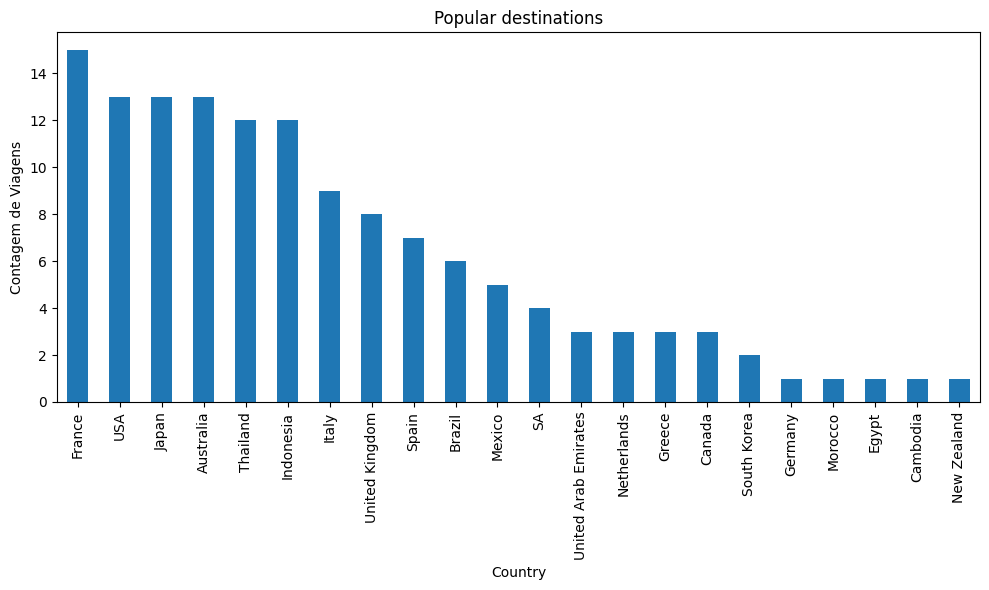

In [ ]:
# Determine quais países são os destinos mais populares
popular_destinations = dados['Country'].value_counts()

# Definindo o tamanho do grafico
plt.figure(figsize=(10, 6))

# Usando o metodo de barras para analise dos dados
popular_destinations.plot(kind='bar')

# Rótulos e título ao gráfico
plt.xlabel('Country')
plt.ylabel('Contagem de Viagens')
plt.title('Popular destinations')

# Ajuste do layout para evitar cortar rótulos longos
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Análise de Viagens por Meio de Transporte:

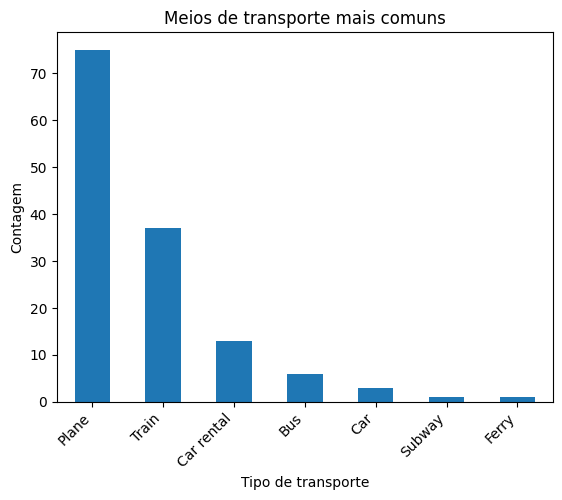

In [ ]:
# Quais meios de transporte são mais comuns nas viagens
transportation_counts = dados['Transportation type'].value_counts()

# Plotar o gráfico de barras
ax = transportation_counts.plot(kind='bar')
plt.title('Meios de transporte mais comuns')
plt.xlabel('Tipo de transporte')
plt.ylabel('Contagem')

# Rotacionar os rótulos do eixo x em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()


## Analise das variaves do dataset

In [ ]:
#Criando um arquivo Json para criar visualização dos dados no Pandas Profiling

# Defina as opções desejadas no formato de dicionário
config_options = {
    "title": "Relatório Pandas Profiling",
}

# Especifique o caminho do arquivo de configuração
config_file_path = '/content/config.json'  # Altere o caminho conforme necessário

# Salve as opções no arquivo de configuração JSON
with open(config_file_path, 'w') as config_file:
    json.dump(config_options, config_file)

# Verifique se o arquivo foi criado corretamente
!cat {config_file_path}


{"title": "Relat\u00f3rio Pandas Profiling"}

In [ ]:
# Criar o relatório usando o arquivo de configuração json
prof = ProfileReport(dados, config_file=config_file_path)
prof.to_file(output_file='output.html')
prof

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
<ipython-input-27-65db5eddbad5>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Machinele Learning

## Analise de regressão linear, comparando variaveis

In [ ]:
dados['Gender'] = dados['Traveler gender'].map({'Male': 1, 'Female': 2})

Coeficiente (inclinação): 0.3400110344698126
Intercepto: 236.7907760049501
Erro Médio Quadrático (MSE): 187155.95864684737


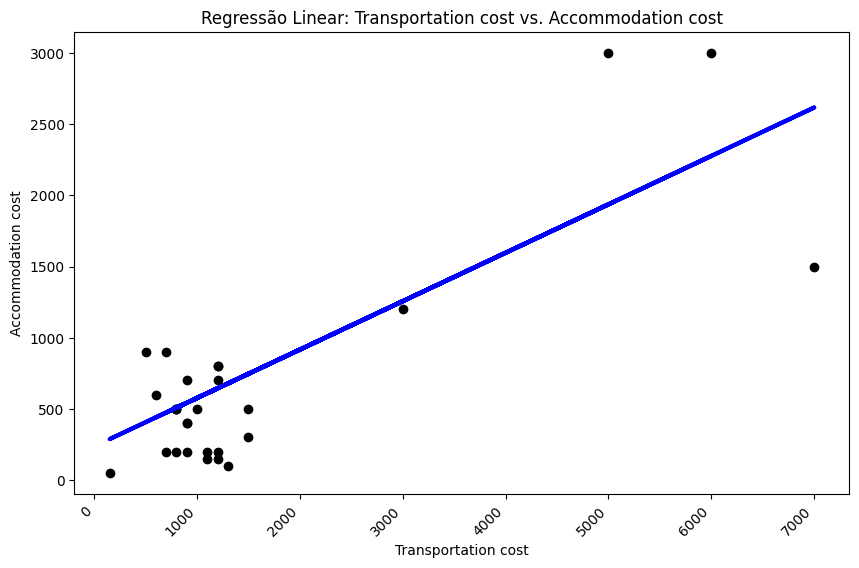

In [ ]:
# Criando uma nova coluna 'Total Cost' somando 'Accommodation cost' e 'Transportation cost'
dados['Total Cost'] = dados['Accommodation cost'] + dados['Transportation cost']

# Selecionar as features (X) e o alvo (y)
X = dados[['Accommodation cost']]
y = dados['Transportation cost']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)

# Imprimir os coeficientes do modelo
print('Coeficiente (inclinação):', model.coef_[0])
print('Intercepto:', model.intercept_)
print('Erro Médio Quadrático (MSE):', mse)

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar o gráfico de dispersão e a linha de regressão
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Regressão Linear: Transportation cost vs. Accommodation cost')
plt.xlabel('Transportation cost')
plt.ylabel('Accommodation cost')

# Definir o formato do eixo x para exibir apenas números inteiros
plt.xticks(rotation=45, ha='right')  # Ajuste conforme necessário
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.show()